In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\USER\AppData\Local\Temp\ipykernel_7824\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Part A - Linearly Seperable Points

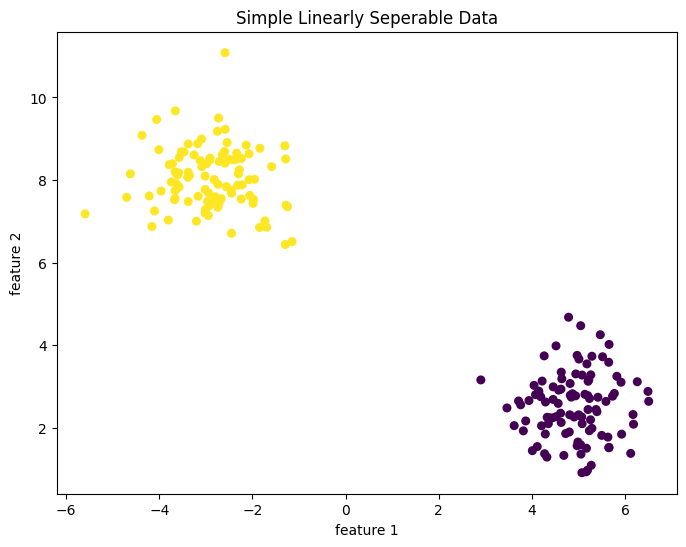

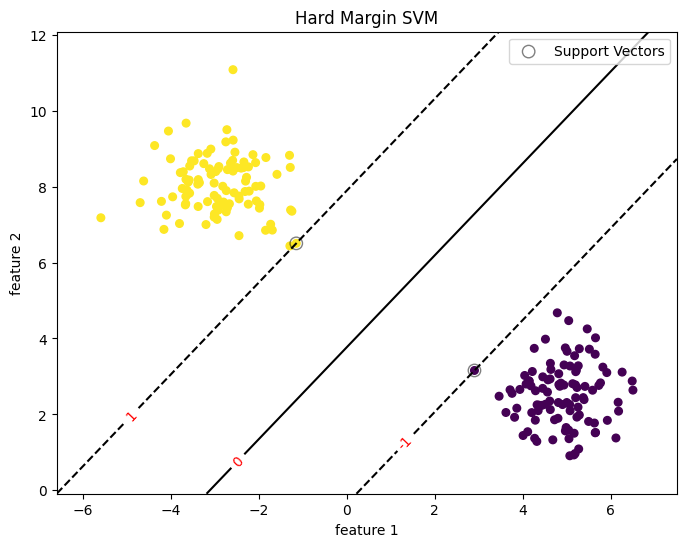

In [54]:
#synthetic data generation

from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X,y =make_blobs(n_samples=200, n_features=2, centers=[[5,2.5],[-3,8]],random_state=42,cluster_std=0.8)

plt.figure(figsize=(8,6))

plt.scatter(X[:,0],X[:,1],c=y,s=30)

plt.title("Simple Linearly Seperable Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

plt.show()

#defining the model 

hard_svm=SVC(C=1e10,kernel="linear")

hard_svm.fit(X,y)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

z=hard_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,s=30)
plt.scatter(hard_svm.support_vectors_[:,0],hard_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,label="Support Vectors")

contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Hard Margin SVM")

plt.legend()
plt.show()

Part B - Soft Margin

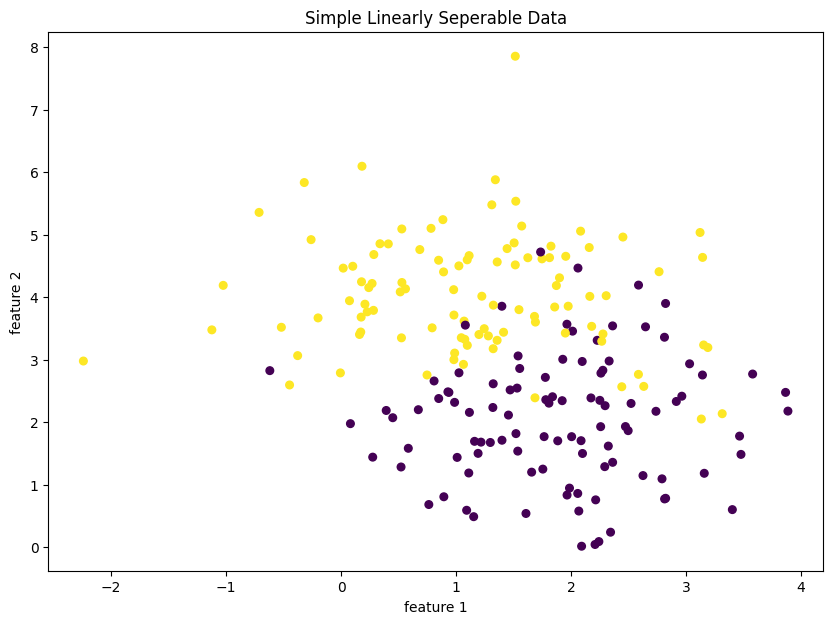

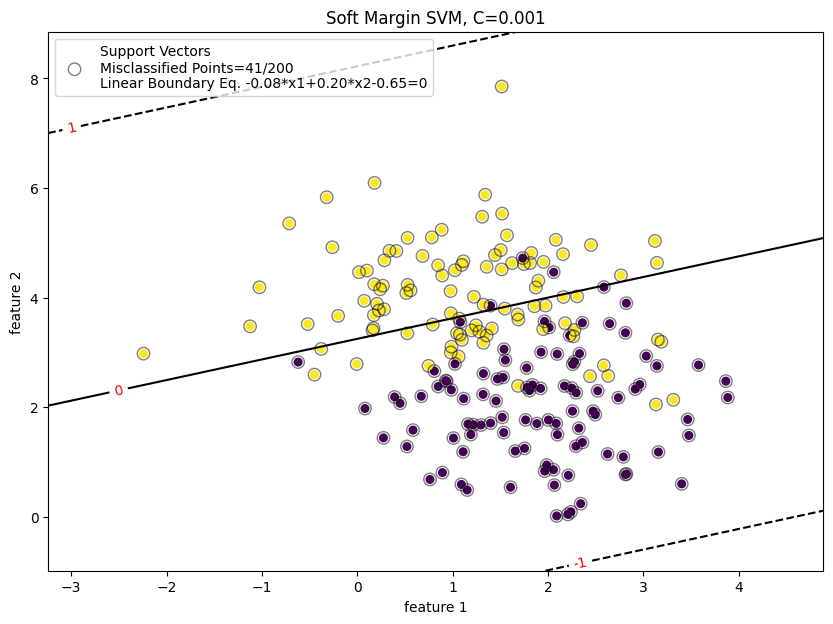

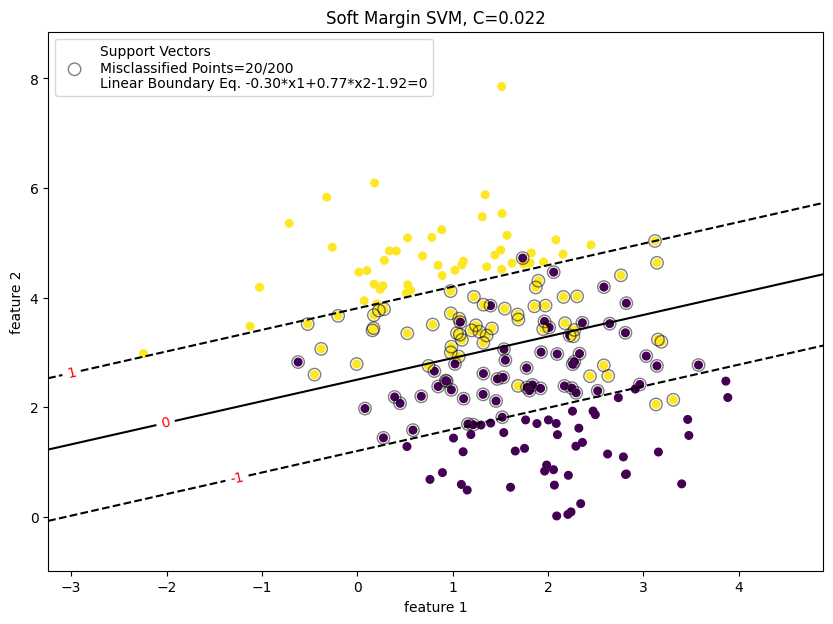

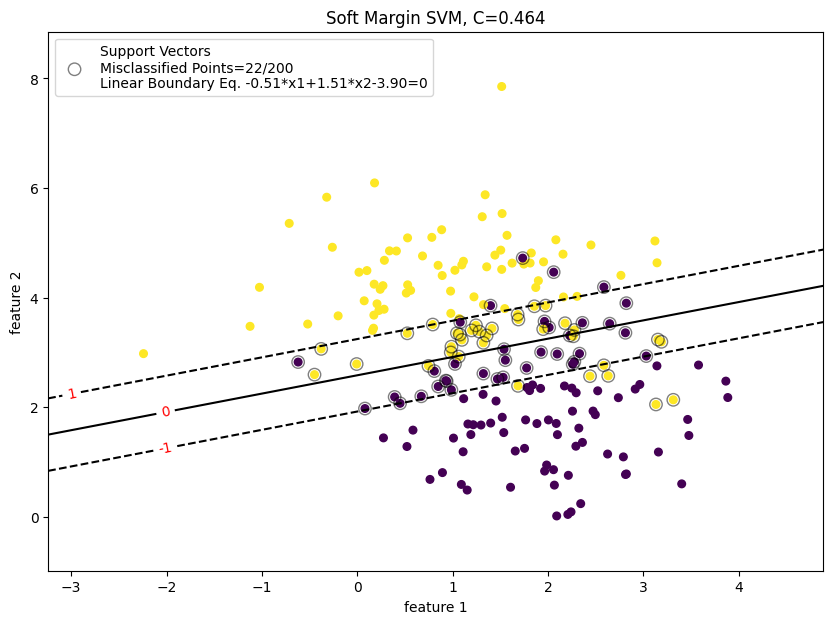

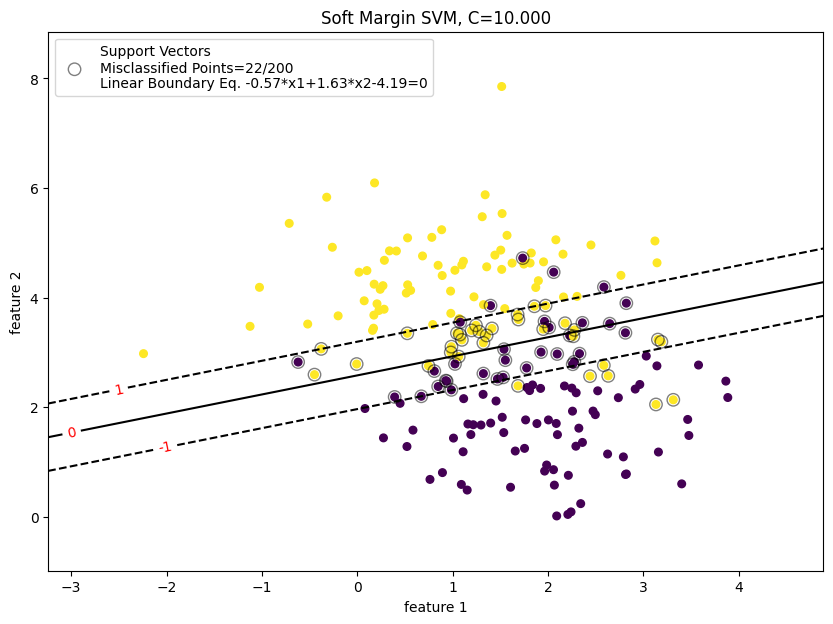

In [ ]:
#synthetic data generation

from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X,y =make_blobs(n_samples=200, n_features=2, centers=[[2,2],[1,4]],random_state=42,cluster_std=1)

plt.figure(figsize=(10,7))

plt.scatter(X[:,0],X[:,1],c=y,s=30)

plt.title("Simple Linearly Seperable Data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

plt.show()


x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

C_list=np.logspace(-3,1,4)

#defining the model
for i,c in enumerate(C_list):

    soft_svm=SVC(C=c,kernel="linear")

    soft_svm.fit(X,y)

    z=soft_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y.flatten())
    misclassified_number=int(n_samples-np.sum(soft_svm.predict(X).flatten()==y.flatten()))
    b_1=soft_svm.coef_[0][0]
    b_2=soft_svm.coef_[0][1]
    b_0=soft_svm.intercept_[0]

    plt.figure(figsize=(10,7))
    plt.scatter(X[:,0],X[:,1],c=y,s=30)
    plt.scatter(soft_svm.support_vectors_[:,0],soft_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nLinear Boundary Eq. {b_1:.2f}*x1+{b_2:.2f}*x2{b_0:.2f}=0")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"Soft Margin SVM, C={c:.3f}")

    plt.legend()
    plt.show()

Part C

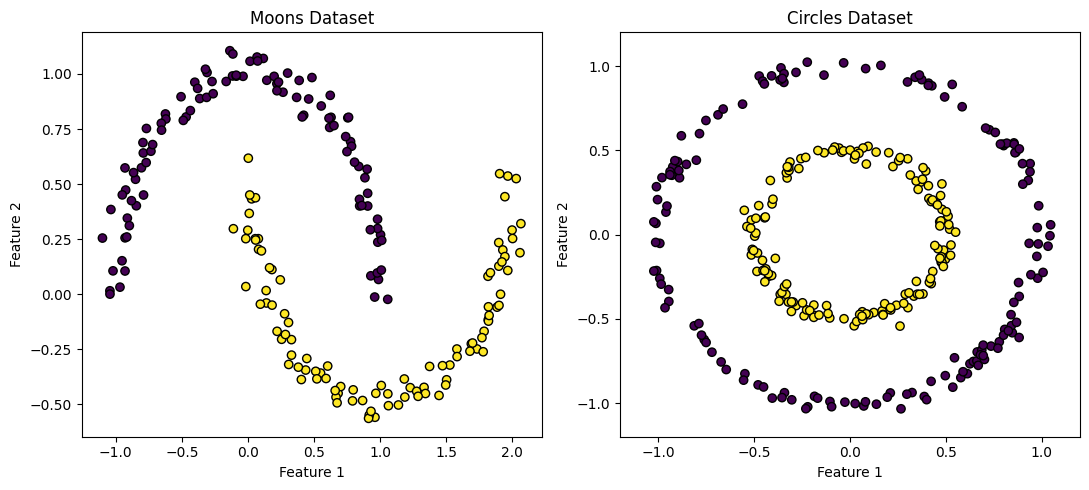

In [141]:
#creating Circles dataset

r_1, r_2 =0.5, 1

np.random.seed(40)
r1_array=np.random.normal(r_1,0.03,size=150)
r2_array=np.random.normal(r_2,0.03,size=150)
theta_array_1=np.random.uniform(0,2*np.pi,size=150)
theta_array_2=np.random.uniform(0,2*np.pi,size=150)

x,y=np.hstack([r1_array*np.cos(theta_array_1),r2_array*np.cos(theta_array_2)]),np.hstack([r1_array*np.sin(theta_array_1),r2_array*np.sin(theta_array_2)])

y_circle=np.hstack([1*np.ones(len(r1_array)),0*np.ones(len(r2_array))])
X_circle=np.c_[x,y]

plt.figure(figsize=(11,5))

plt.subplot(1,2,2)
plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle,edgecolors="k")
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.title("Circles Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")



from sklearn.datasets import make_moons

# Step 1: Generate moons dataset
X_moon, y_moon = make_moons(n_samples=200, noise=0.05, random_state=42)

# Step 2: Scatter plot with color-coded classes
plt.subplot(1,2,1)
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, edgecolors='k')

# Step 3: Style the plot
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
#plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()


here we apply cross validation on Moons dataset since circles dataset is not linearly seperable by any means.

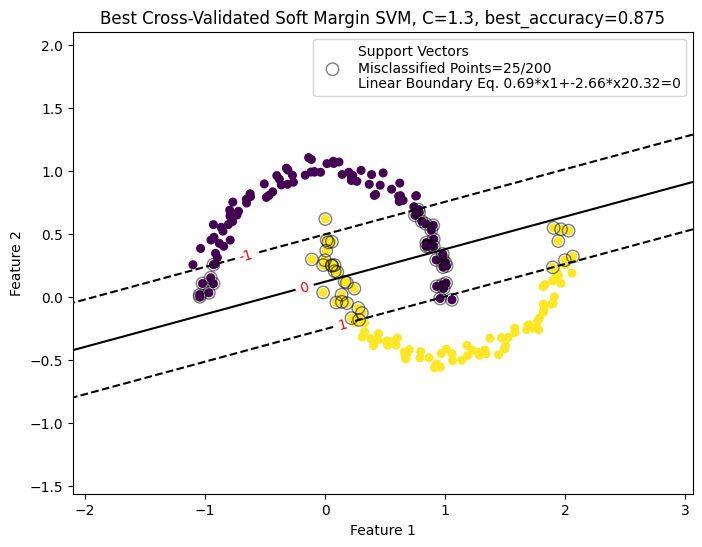

In [161]:
#trying Linear SVM naively on Moons
from sklearn.model_selection import GridSearchCV

x_min, x_max = X_moon[:,0].min() - 1, X_moon[:,0].max() + 1
y_min, y_max = X_moon[:,1].min() - 1, X_moon[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

C_list=np.logspace(-3,1,10)

#defining the model
param_grid={"C":C_list}

model=SVC(kernel="linear")

grid_search=GridSearchCV(model,param_grid=param_grid,cv=5,scoring="accuracy")


grid_search.fit(X_moon,y_moon)

c=grid_search.best_params_["C"]
best_score=grid_search.best_score_

soft_svm_best=SVC(kernel="linear",C=c)
soft_svm_best.fit(X_moon,y_moon)

z=soft_svm_best.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

n_samples=len(y_moon.flatten())
misclassified_number=int(n_samples-np.sum(soft_svm_best.predict(X_moon).flatten()==y_moon.flatten()))
b_1=soft_svm_best.coef_[0][0]
b_2=soft_svm_best.coef_[0][1]
b_0=soft_svm_best.intercept_[0]


plt.figure(figsize=(8,6))
plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon,s=30)
plt.scatter(soft_svm_best.support_vectors_[:,0],soft_svm_best.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
            label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nLinear Boundary Eq. {b_1:.2f}*x1+{b_2:.2f}*x2{b_0:.2f}=0")

contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Best Cross-Validated Soft Margin SVM, C={c:.1f}, best_accuracy={best_score}")

plt.legend()
plt.show()

Hyperparamer effect on Polynomial, RBF and Sigmoid Kernels

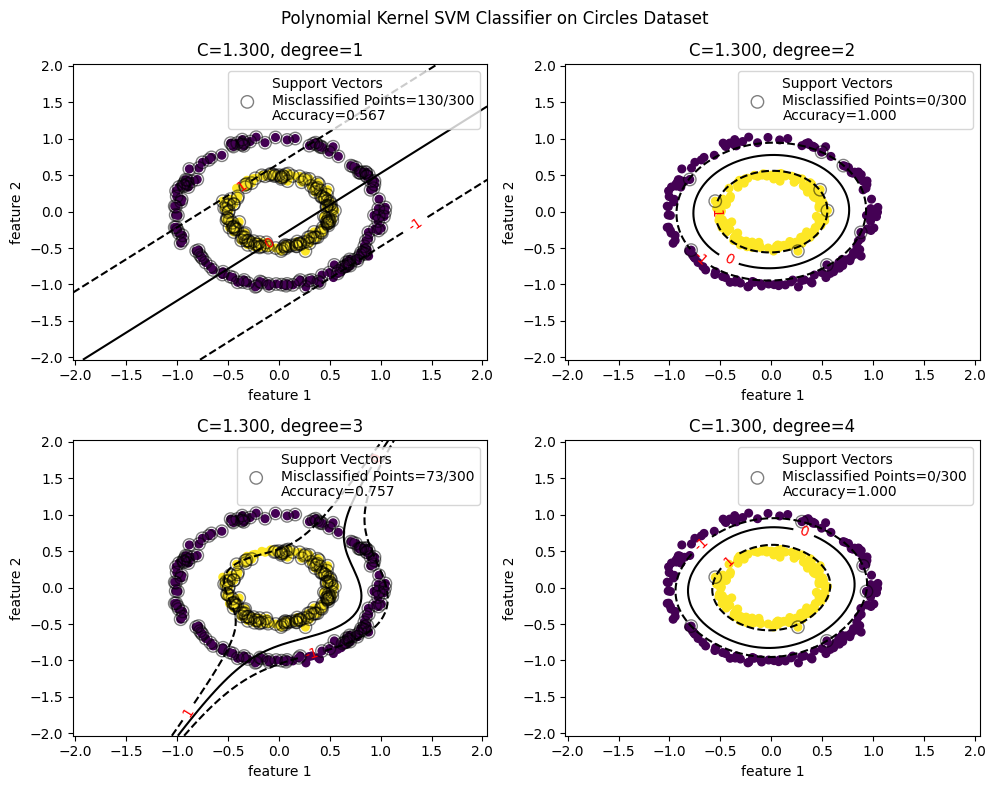

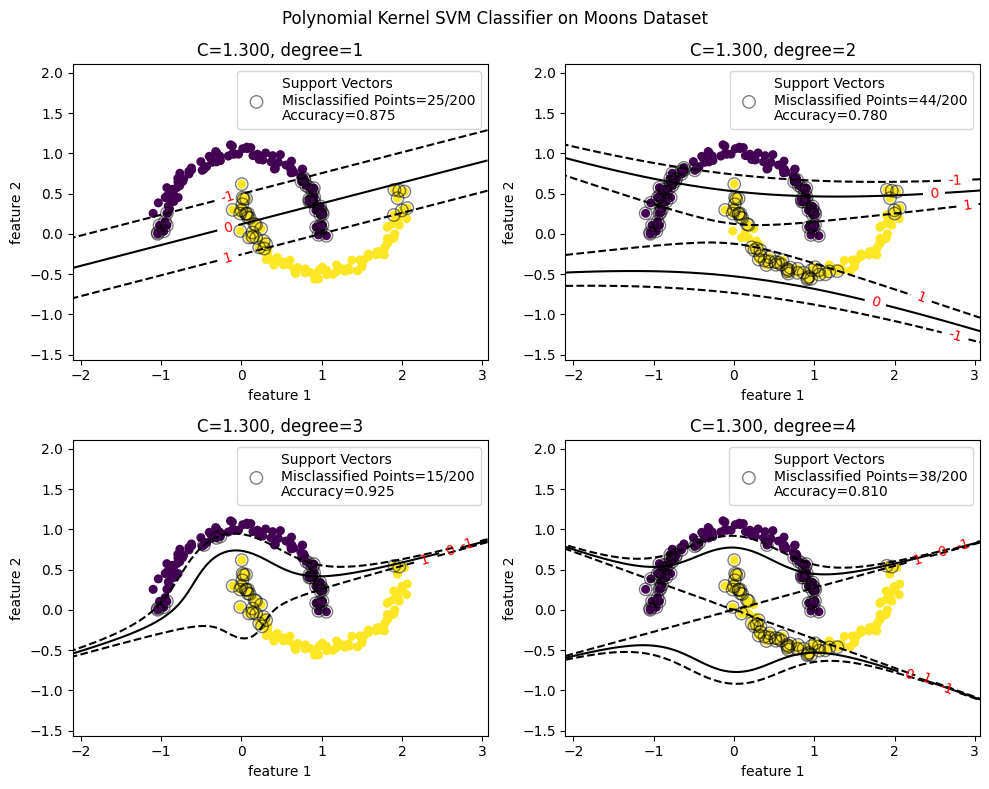

In [182]:
#polynomial kernel, hyperparameter=degree

#on circles dataset
x_min, x_max = X_circle[:,0].min() - 1, X_circle[:,0].max() + 1
y_min, y_max = X_circle[:,1].min() - 1, X_circle[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

d_list=[1,2,3,4]

c=1.3

plt.figure(figsize=(10,8))
plt.suptitle("Polynomial Kernel SVM Classifier on Circles Dataset")
#defining the model
for i,d in enumerate(d_list):

    poly_svm=SVC(C=c,kernel="poly",degree=d)

    poly_svm.fit(X_circle,y_circle)

    z=poly_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y_circle.flatten())
    misclassified_number=int(n_samples-np.sum(poly_svm.predict(X_circle).flatten()==y_circle.flatten()))
    

    plt.subplot(2,2,i+1)
    plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle,s=30)
    plt.scatter(poly_svm.support_vectors_[:,0],poly_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={poly_svm.score(X_circle,y_circle):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"C={c:.3f}, degree={d}")

    plt.legend()

plt.tight_layout()
plt.show()



#on moons dataset

x_min, x_max = X_moon[:,0].min() - 1, X_moon[:,0].max() + 1
y_min, y_max = X_moon[:,1].min() - 1, X_moon[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

d_list=[1,2,3,4]

c=1.3

plt.figure(figsize=(10,8))
plt.suptitle("Polynomial Kernel SVM Classifier on Moons Dataset")
for i,d in enumerate(d_list):

    poly_svm=SVC(C=c,kernel="poly",degree=d)

    poly_svm.fit(X_moon,y_moon)

    z=poly_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y_moon.flatten())
    misclassified_number=int(n_samples-np.sum(poly_svm.predict(X_moon).flatten()==y_moon.flatten()))
    

    plt.subplot(2,2,i+1)
    plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon,s=30)
    plt.scatter(poly_svm.support_vectors_[:,0],poly_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={poly_svm.score(X_moon,y_moon):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"C={c:.3f}, degree={d}")

    plt.legend()

plt.tight_layout()
plt.show()

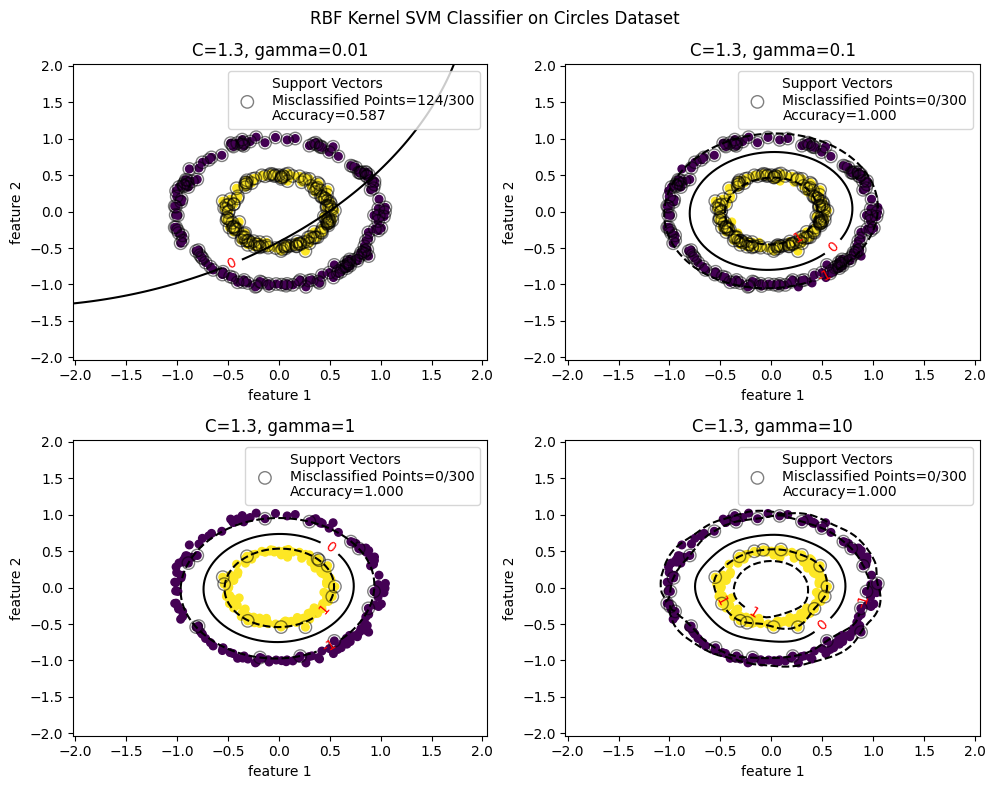

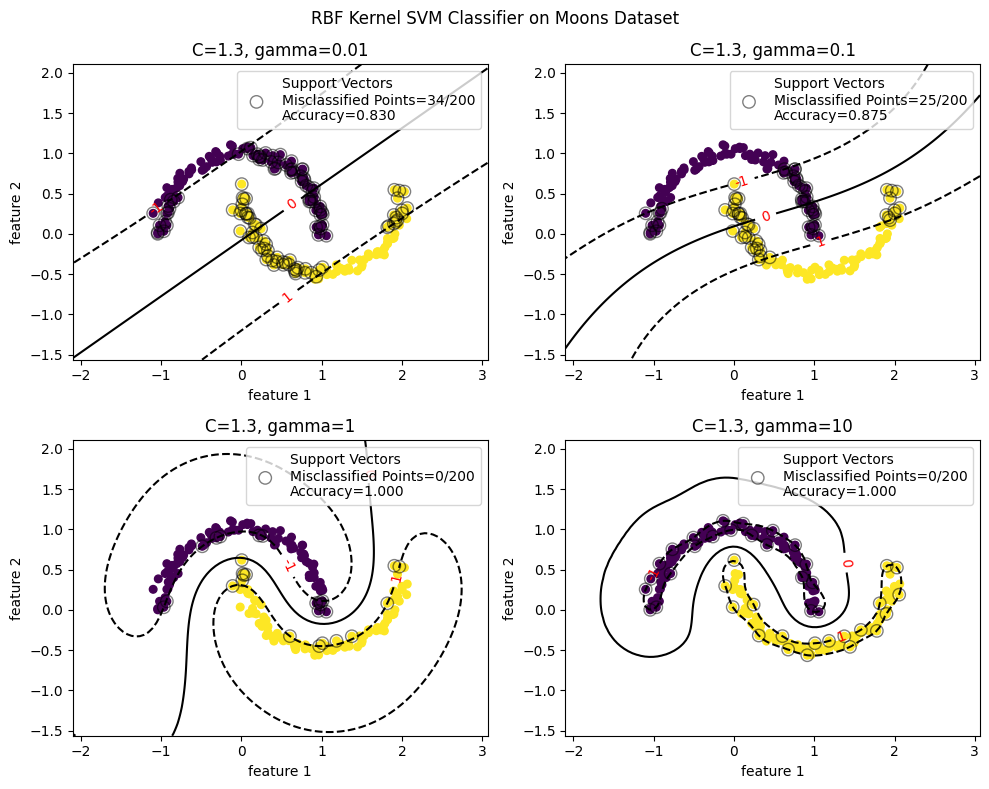

In [185]:
#RBF kernel, hyperparameter=gamma

#on circles dataset
x_min, x_max = X_circle[:,0].min() - 1, X_circle[:,0].max() + 1
y_min, y_max = X_circle[:,1].min() - 1, X_circle[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

gamma_list=[0.01,0.1,1,10]

c=1.3

plt.figure(figsize=(10,8))
plt.suptitle("RBF Kernel SVM Classifier on Circles Dataset")
#defining the model
for i,gamma in enumerate(gamma_list):

    rbf_svm=SVC(C=c,kernel="rbf",gamma=gamma)

    rbf_svm.fit(X_circle,y_circle)

    z=rbf_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y_circle.flatten())
    misclassified_number=int(n_samples-np.sum(rbf_svm.predict(X_circle).flatten()==y_circle.flatten()))
    

    plt.subplot(2,2,i+1)
    plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle,s=30)
    plt.scatter(rbf_svm.support_vectors_[:,0],rbf_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={rbf_svm.score(X_circle,y_circle):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"C={c:.1f}, gamma={gamma}")

    plt.legend()

plt.tight_layout()
plt.show()



#on moons dataset

x_min, x_max = X_moon[:,0].min() - 1, X_moon[:,0].max() + 1
y_min, y_max = X_moon[:,1].min() - 1, X_moon[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 



plt.figure(figsize=(10,8))
plt.suptitle("RBF Kernel SVM Classifier on Moons Dataset")

for i,gamma in enumerate(gamma_list):

    rbf_svm=SVC(C=c,kernel="rbf",gamma=gamma)

    rbf_svm.fit(X_moon,y_moon)

    z=rbf_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y_moon.flatten())
    misclassified_number=int(n_samples-np.sum(rbf_svm.predict(X_moon).flatten()==y_moon.flatten()))
    

    plt.subplot(2,2,i+1)
    plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon,s=30)
    plt.scatter(rbf_svm.support_vectors_[:,0],rbf_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={rbf_svm.score(X_moon,y_moon):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"C={c:.1f}, gamma={gamma}")

    plt.legend()

plt.tight_layout()
plt.show()

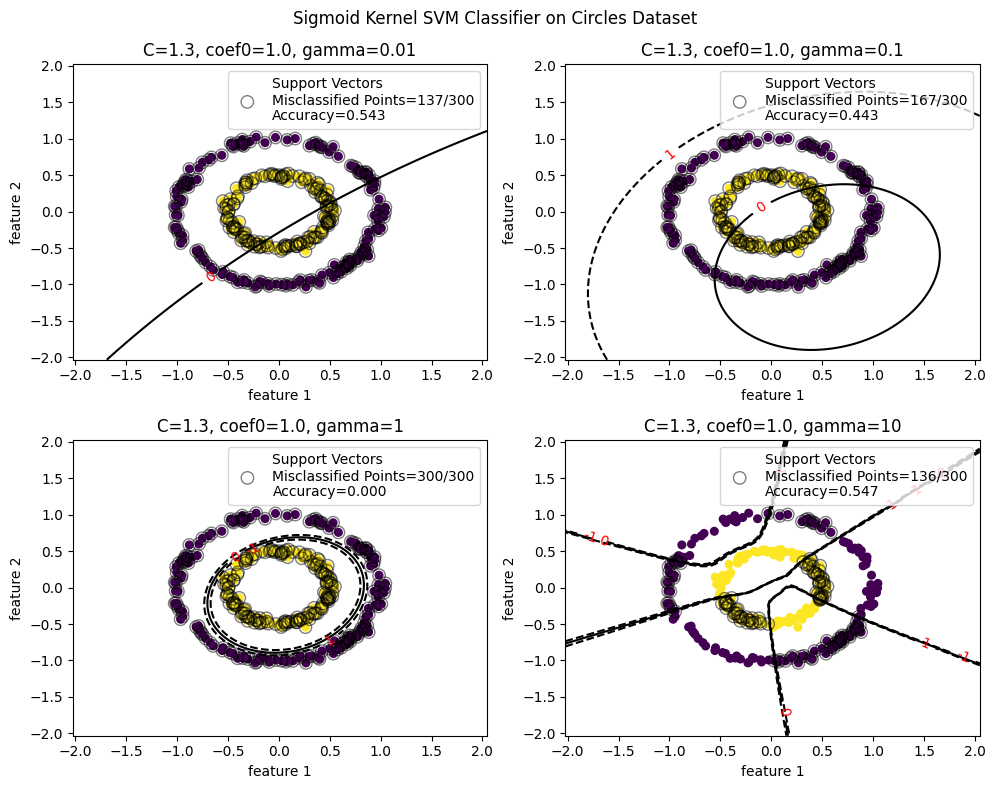

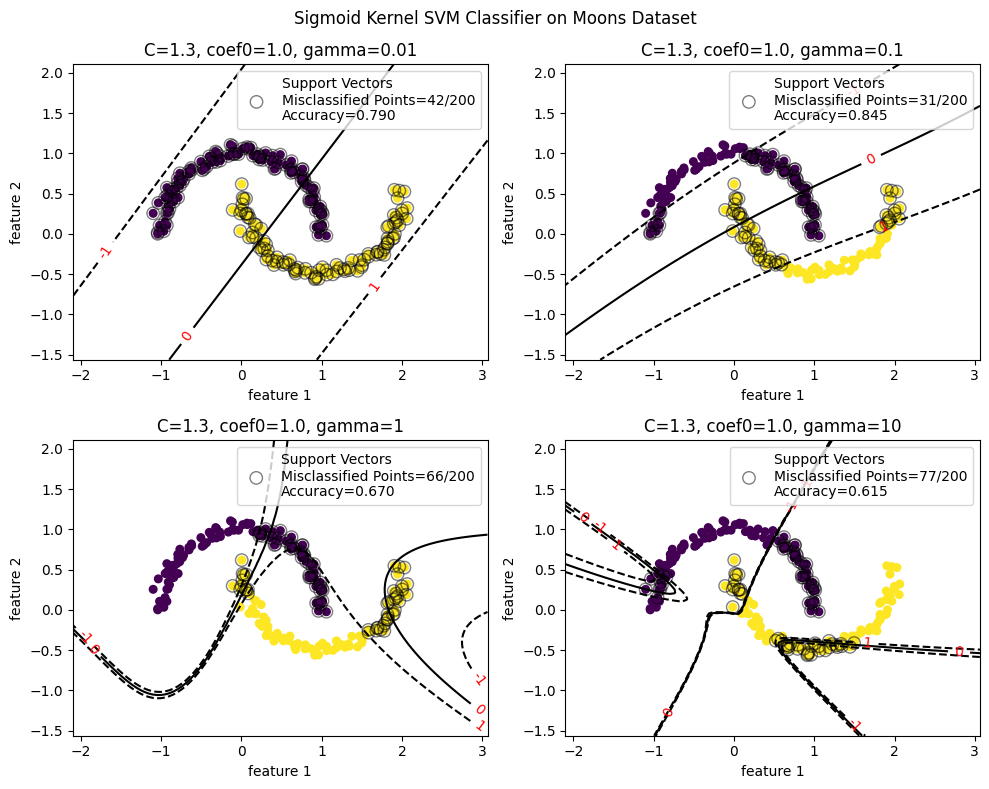

In [187]:
#Sigmoid kernel, hyperparameter=gamma and coef0 is fixed at 1.0
#K=tanh(γ⋅⟨x,x′⟩+coef0)

#on circles dataset
x_min, x_max = X_circle[:,0].min() - 1, X_circle[:,0].max() + 1
y_min, y_max = X_circle[:,1].min() - 1, X_circle[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

gamma_list=[0.01,0.1,1,10]

c=1.3

plt.figure(figsize=(10,8))
plt.suptitle("Sigmoid Kernel SVM Classifier on Circles Dataset")
#defining the model
for i,gamma in enumerate(gamma_list):

    rbf_svm=SVC(C=c,kernel="sigmoid",gamma=gamma,coef0=1.0)

    rbf_svm.fit(X_circle,y_circle)

    z=rbf_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y_circle.flatten())
    misclassified_number=int(n_samples-np.sum(rbf_svm.predict(X_circle).flatten()==y_circle.flatten()))
    

    plt.subplot(2,2,i+1)
    plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle,s=30)
    plt.scatter(rbf_svm.support_vectors_[:,0],rbf_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={rbf_svm.score(X_circle,y_circle):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"C={c:.1f}, coef0=1.0, gamma={gamma}")

    plt.legend()

plt.tight_layout()
plt.show()



#on moons dataset

x_min, x_max = X_moon[:,0].min() - 1, X_moon[:,0].max() + 1
y_min, y_max = X_moon[:,1].min() - 1, X_moon[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 



plt.figure(figsize=(10,8))
plt.suptitle("Sigmoid Kernel SVM Classifier on Moons Dataset")

for i,gamma in enumerate(gamma_list):

    rbf_svm=SVC(C=c,kernel="sigmoid",gamma=gamma,coef0=1.0)
    rbf_svm.fit(X_moon,y_moon)

    z=rbf_svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y_moon.flatten())
    misclassified_number=int(n_samples-np.sum(rbf_svm.predict(X_moon).flatten()==y_moon.flatten()))
    

    plt.subplot(2,2,i+1)
    plt.scatter(X_moon[:,0],X_moon[:,1],c=y_moon,s=30)
    plt.scatter(rbf_svm.support_vectors_[:,0],rbf_svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={rbf_svm.score(X_moon,y_moon):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")


    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"C={c:.1f}, coef0=1.0, gamma={gamma}")

    plt.legend()

plt.tight_layout()
plt.show()

Part D

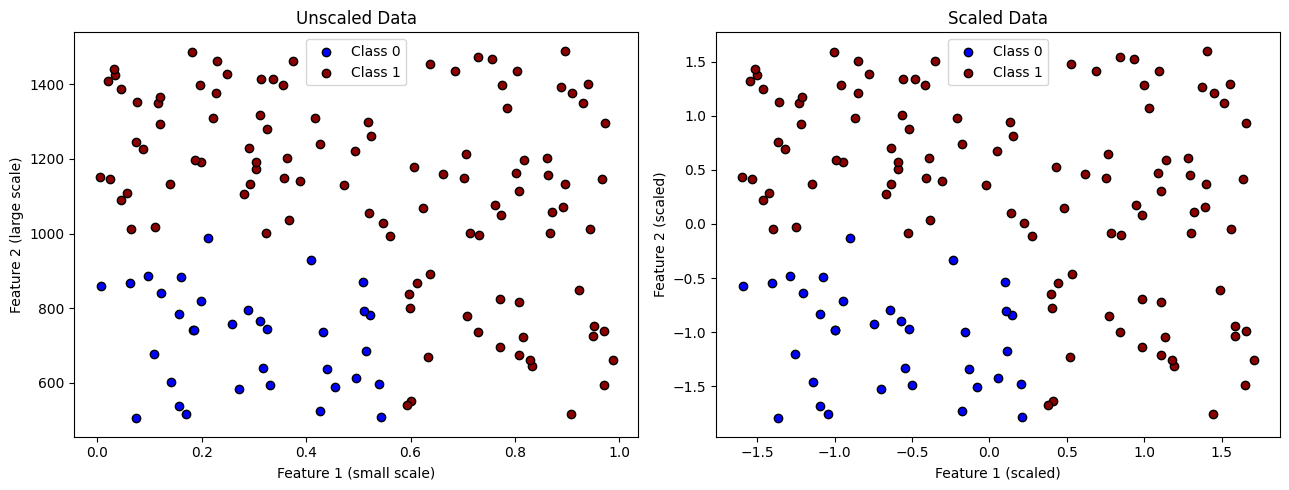

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 140
feature_1 = np.random.rand(n_samples)  # small scale (0 to 1)
feature_2 = np.random.rand(n_samples) * 1000 + 500  # large scale (500 to 1500)

# Create labels based on some simple rule for demonstration
labels = (feature_2 > 1000).astype(int)  # Label 1 if feature_2 > 1000, else 0
labels[np.where(feature_1>0.55)[0]]=1
# Plotting
plt.figure(figsize=(13, 5))

plt.subplot(1,2,1)
for label, color in zip([0, 1], ['blue', 'darkred']):
    plt.scatter(feature_1[labels == label], feature_2[labels == label], 
                c=color, label=f'Class {label}', edgecolor='black')

plt.title("Unscaled Data")
plt.xlabel("Feature 1 (small scale)")
plt.ylabel("Feature 2 (large scale)")
plt.legend()


X_unscaled=np.c_[feature_1,feature_2]
y=labels

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X_unscaled)

plt.subplot(1,2,2)
for label, color in zip([0, 1], ['blue', 'darkred']):
    plt.scatter(X_scaled[:,0][labels == label], X_scaled[:,1][labels == label], 
                c=color, label=f'Class {label}', edgecolor='black')

plt.title("Scaled Data")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.tight_layout()
plt.show()



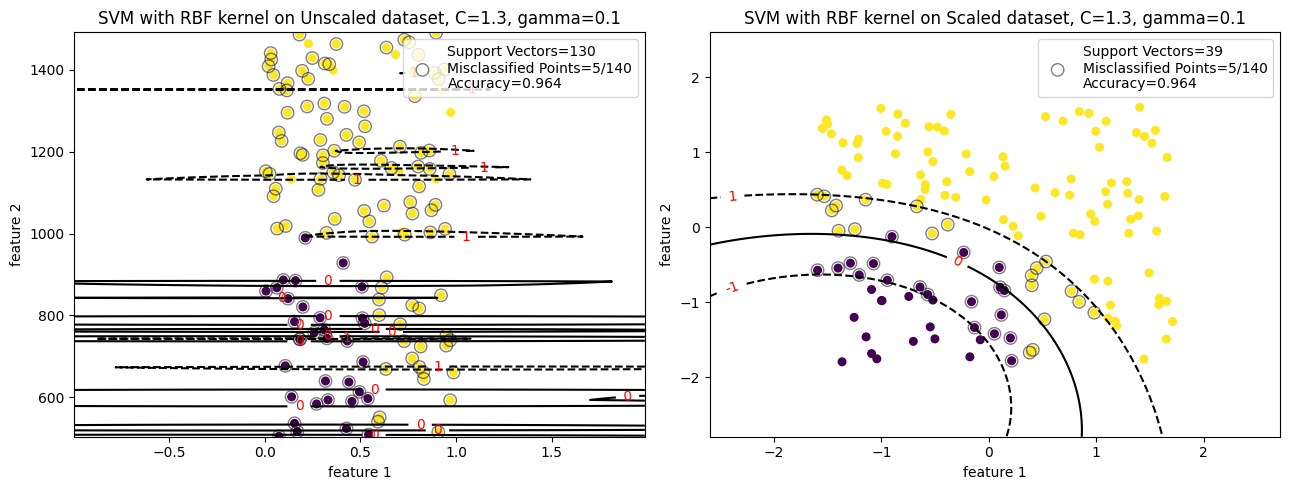

In [220]:
data_dict={"Unscaled":X_unscaled,"Scaled":X_scaled}
gamma=0.1
c=1.3

plt.figure(figsize=(13,5))

for i,key in enumerate(data_dict.keys()):

    X=data_dict[key] 

    svm=SVC(C=c,kernel="rbf",gamma=gamma)

    svm.fit(X,y)

    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    z=svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y.flatten())
    misclassified_number=int(n_samples-np.sum(svm.predict(X).flatten()==y.flatten()))
    

    plt.subplot(1,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=y,s=30)
    plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors={len(svm.support_vectors_[:,0])}\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={svm.score(X,y):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"SVM with RBF kernel on "+key+f" dataset, C={c}, gamma={gamma}")

    plt.legend(loc="upper right")
    
plt.tight_layout()
plt.show()    
    

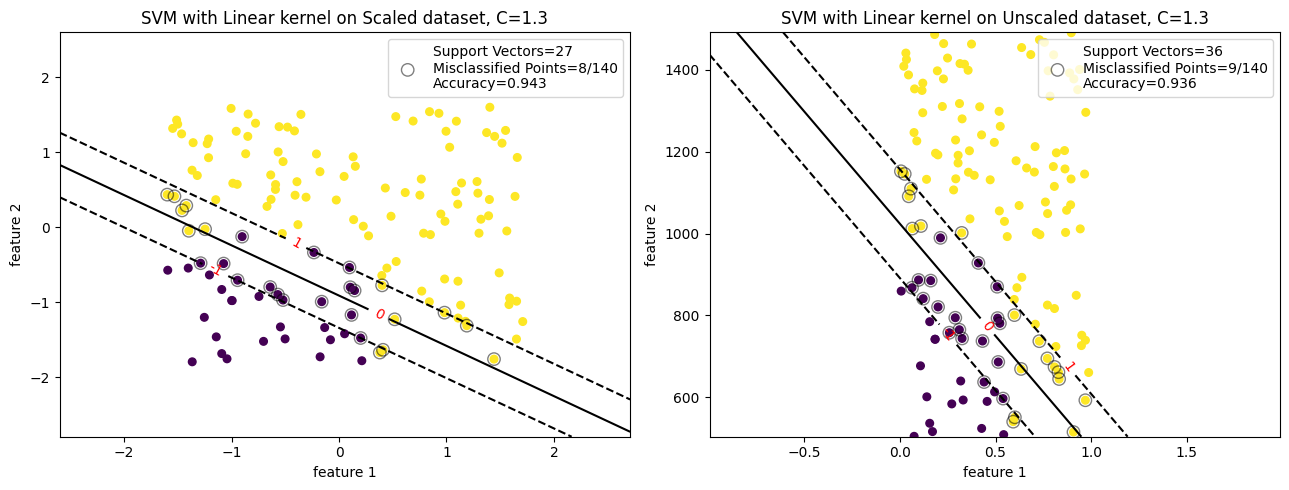

In [ ]:
data_dict={"Unscaled":X_unscaled,"Scaled":X_scaled}
c=1.3

plt.figure(figsize=(13,5))

for i,key in enumerate(data_dict.keys()):

    X=data_dict[key] 

    svm=SVC(C=c,kernel="linear")

    svm.fit(X,y)

    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    z=svm.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

    n_samples=len(y.flatten())
    misclassified_number=int(n_samples-np.sum(svm.predict(X).flatten()==y.flatten()))
    

    plt.subplot(1,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=y,s=30)
    plt.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors={len(svm.support_vectors_[:,0])}\nMisclassified Points={misclassified_number}/{n_samples}\nAccuracy={svm.score(X,y):.3f}")

    contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
    plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")

    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f"SVM with Linear kernel on "+key+f" dataset, C={c}")

    plt.legend(loc="upper right")
    
plt.tight_layout()
plt.show()    
    

Result Analysis: For the RBF kernel, it is observed that the number of support vectors differs markedly between scaled and unscaled trained models, whereas for the linear kernel, this difference is less noticeable. Furthermore, with regard to the shape of the margin and decision boundary, the linear kernel again proves more robust and less sensitive compared to the RBF kernel. As expected, the linear kernel is less sensitive to data scaling relative to the RBF kernel.

Why is that? 
RBF uses a local measure of similarity between data points, at its kernel formula a euclidean distance and then an exponential of the distance is calculated so it is heavily dependent of the scales of the features. However, linear kernel is simply a dot product in a way that scaling whole data by a factor of 10 scales all kernel values by 10 so leaves the normal vector of decision boundary approximately unchanged.

Part E

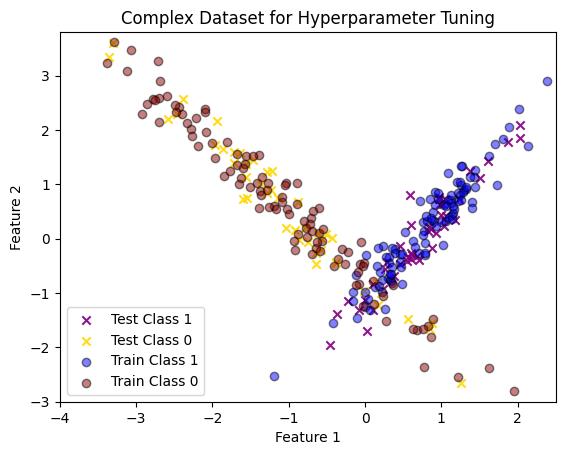

In [249]:
#line class 0 : y=-1.25*x-0.75  x1:[-4,2]
#line class 1 : y=1.5*x-1       x1:[-0.5,2]

from sklearn.model_selection import train_test_split

np.random.seed(42)
class_sample_numbers=150
x1_class0_array=np.random.normal(-1,1.2,size=(class_sample_numbers))
x1_class1_array=np.random.normal(0.75,0.6,size=(class_sample_numbers))
y_class0_array=0*np.ones(class_sample_numbers)

x2_class0_array=-1.25*x1_class0_array-0.75+np.random.normal(scale=0.3,size=(class_sample_numbers))
x2_class1_array=1.5*x1_class1_array-1+np.random.normal(scale=0.3,size=(class_sample_numbers))
y_class1_array=1*np.ones(class_sample_numbers)

X=np.c_[np.hstack([x1_class0_array,x1_class1_array]),np.hstack([x2_class0_array,x2_class1_array])]
y=np.hstack([y_class0_array,y_class1_array])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y)

plt.figure()

for label, color in zip([1, 0], ['purple', 'gold']):
    plt.scatter(X_test[:,0][y_test == label], X_test[:,1][y_test == label], 
                c=color, label=f'Test Class {label}', marker="x",alpha=0.9)

for label, color in zip([1, 0], ['blue', 'darkred']):
    plt.scatter(X_train[:,0][y_train == label], X_train[:,1][y_train == label], 
                c=color, label=f'Train Class {label}', edgecolor='black',alpha=0.5)
    
plt.legend() 
plt.title("Complex Dataset for Hyperparameter Tuning")   
plt.ylim(-3,3.8)
plt.xlim(-4,2.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [265]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1 ,10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'gamma': ['scale', 0.01,0.1], 'degree': [2, 3, 4]},
    ]

# Step 4: Create the model
svc = SVC()

# Step 5: Set up grid search CV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Step 6: Fit the model
grid_search.fit(X_train, y_train)

# Step 7: Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.9476190476190476


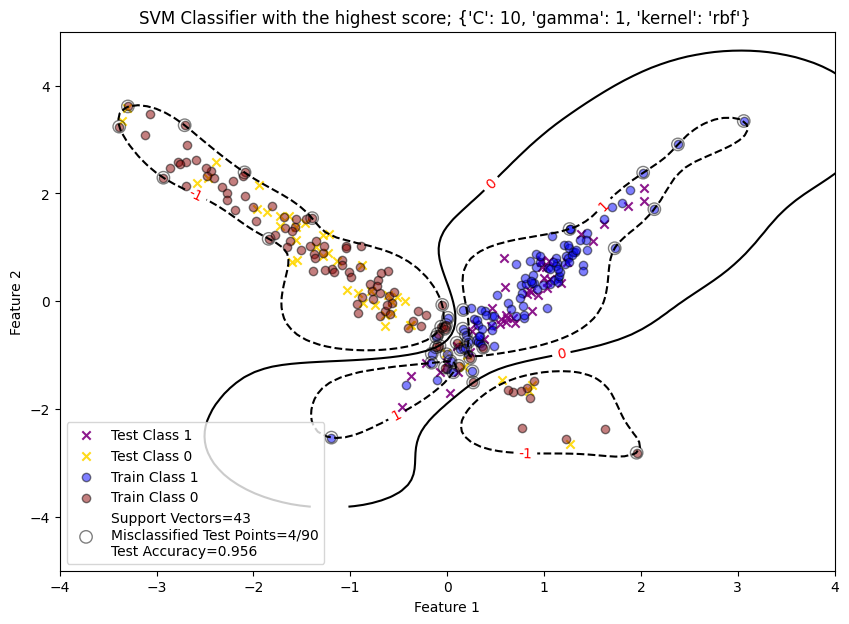

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        45
         1.0       0.92      1.00      0.96        45

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



<Figure size 640x480 with 0 Axes>

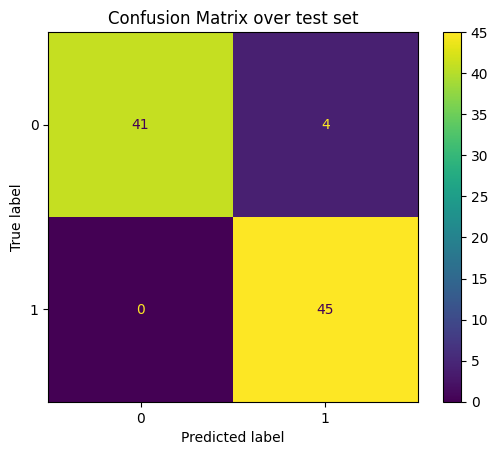

In [272]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

svm_best=SVC(C=10, gamma=1, kernel="rbf")
svm_best.fit(X_train,y_train)

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy= np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100)) 

z=svm_best.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

n_samples=len(y_test.flatten())
misclassified_number=int(n_samples-np.sum(svm_best.predict(X_test).flatten()==y_test.flatten()))
    

plt.figure(figsize=(10,7))

for label, color in zip([1, 0], ['purple', 'gold']):
    plt.scatter(X_test[:,0][y_test == label], X_test[:,1][y_test == label], 
                c=color, label=f'Test Class {label}', marker="x",alpha=0.9)

for label, color in zip([1, 0], ['blue', 'darkred']):
    plt.scatter(X_train[:,0][y_train == label], X_train[:,1][y_train == label], 
                c=color, label=f'Train Class {label}', edgecolor='black',alpha=0.5)
    

plt.title(f"SVM Classifier with the highest score; {grid_search.best_params_} ")   
plt.ylim(-5,5)
plt.xlim(-4,4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.scatter(svm_best.support_vectors_[:,0],svm_best.support_vectors_[:,1],facecolors="none",edgecolors="black",alpha=0.5,s=80,
                label=f"Support Vectors={len(svm_best.support_vectors_[:,0])}\nMisclassified Test Points={misclassified_number}/{n_samples}\nTest Accuracy={svm_best.score(X_test,y_test):.3f}")

contours=plt.contour(xx,yy,z,levels=[-1,0,1],linestyles=["--","-","--"],colors="k")
plt.clabel(contours,fmt={-1:"-1",0:"0",1:"1"},colors="red")

plt.legend() 

plt.show()

y_pred=svm_best.predict(X_test)

cm_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

plt.figure()
cm_disp=ConfusionMatrixDisplay(cm_matrix)
cm_disp.plot()
plt.title("Confusion Matrix over test set")
plt.show()


Part F - Breast Cancer Dataset

In [284]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.9748734177215189
###################################################################### 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        64
           1       0.98      0.97      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<Figure size 640x480 with 0 Axes>

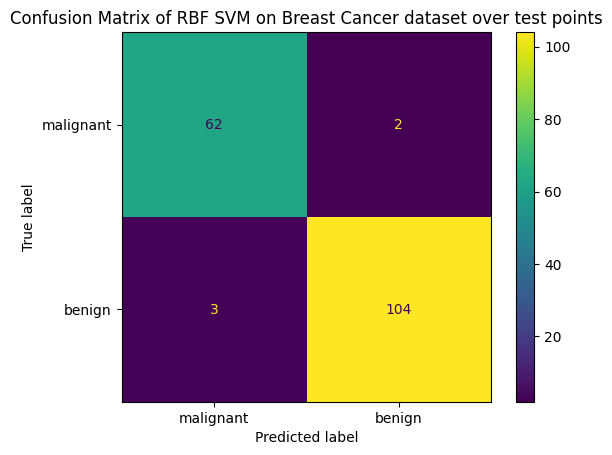

In [288]:
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()

# Convert to DataFrame (optional, but helpful)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Show the first few rows
X=df.iloc[:,0:-1].to_numpy()
y=df.iloc[:,-1].to_numpy()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,stratify=y)

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)

param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1, 1 ,10]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10], 'gamma': ['scale', 0.01,0.1], 'degree': [2, 3, 4]},
    ]

# Step 4: Create the model
svc = SVC()

# Step 5: Set up grid search CV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Step 6: Fit the model
grid_search.fit(X_train_scaled, y_train)

# Step 7: Results
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

print(70*"#","\n")
svm_best_breast=SVC(C=10,gamma="scale",kernel="rbf")
svm_best_breast.fit(X_train_scaled,y_train)
y_pred=svm_best_breast.predict(scaler.transform(X_test))

cm_matrix=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

plt.figure()
cm_disp=ConfusionMatrixDisplay(cm_matrix,display_labels=data.target_names)
cm_disp.plot()
plt.title("Confusion Matrix of RBF SVM on Breast Cancer dataset over test points")
plt.show()

